## Coverage Calculation
> examples are in /src/main.py

## Plots

In [1]:
input_dir = './coverage/'

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
from src.visualization.plots import plot_coverage_order

thres = 50
df_stats_af = pd.read_csv(f"{input_dir}/landcovernet_af/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)
df_stats_as = pd.read_csv(f"{input_dir}/landcovernet_as/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)
df_stats_au = pd.read_csv(f"{input_dir}/landcovernet_au/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)
df_stats_eu = pd.read_csv(f"{input_dir}/landcovernet_eu/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)
df_stats_na = pd.read_csv(f"{input_dir}/landcovernet_na/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)
df_stats_sa = pd.read_csv(f"{input_dir}/landcovernet_sa/assesment_spat_{thres}_temp_{thres}_sel_000102040506071011.csv", index_col=0)

#stack all
df_stats_global = pd.concat([df_stats_af,df_stats_as,df_stats_au,df_stats_eu,df_stats_na,df_stats_sa])

df_stats_eu.head()

,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
30SWH_00,71,71,61.908604,45,63.380282,high,high
30SWH_01,144,144,69.344658,102,70.833333,high,high
30SWH_02,71,42,64.263013,45,63.380282,high,high
30SWH_03,71,50,62.431808,46,64.788732,high,high
30SWH_04,71,47,59.777488,44,61.971831,high,high


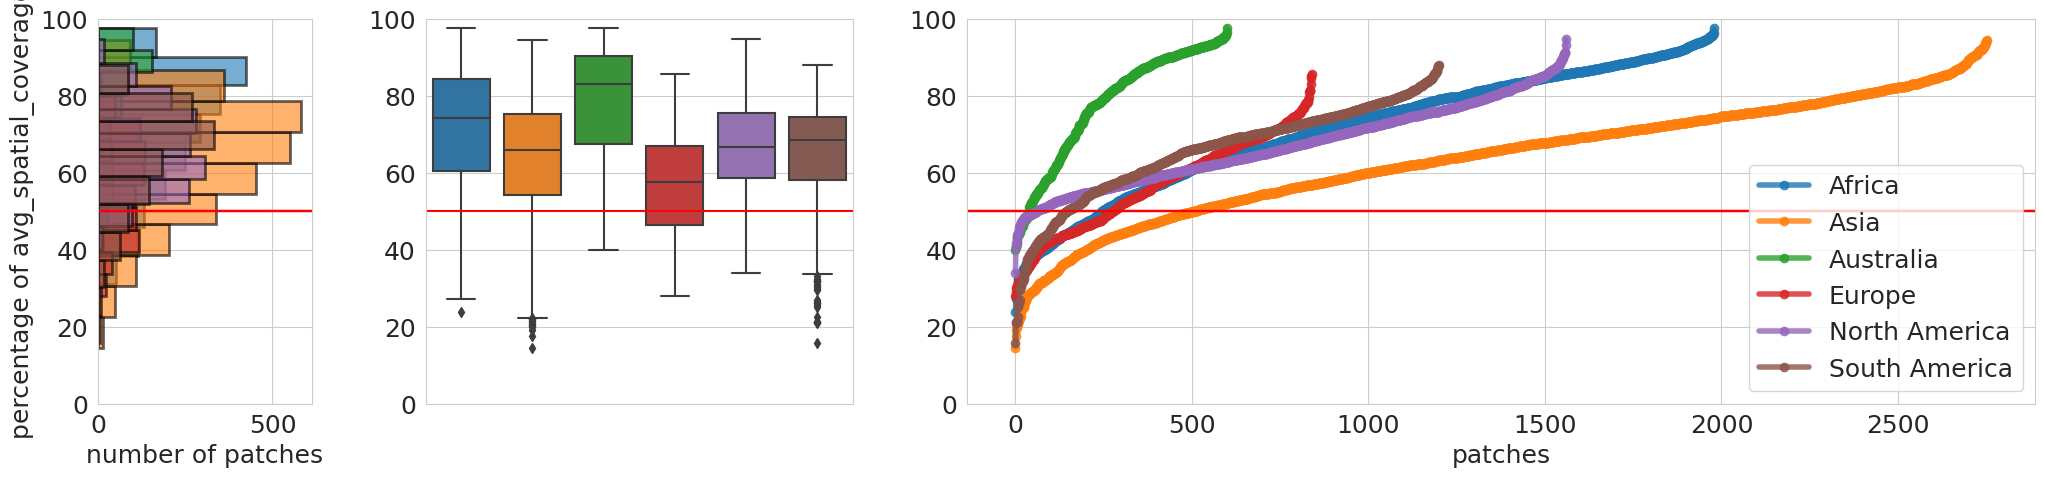

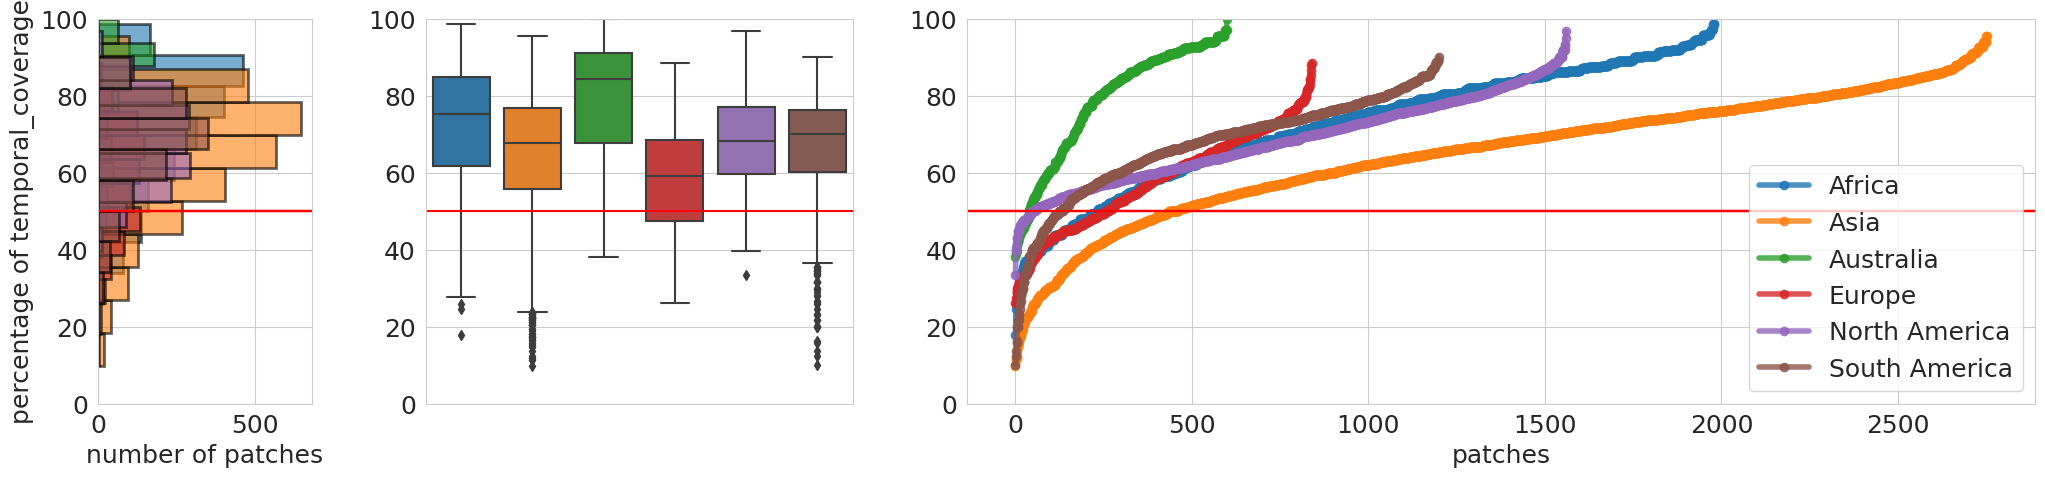

In [7]:
plot_coverage_order([df_stats_af,df_stats_as,df_stats_au,df_stats_eu,df_stats_na,df_stats_sa], 
                    ["Africa", "Asia", "Australia", "Europe", "North America", "South America"], 
                    "avg_spatial_coverage", lower_limit=thres, lower_limit_show=True)
plt.savefig(f"imgs/landcovernet_spatial_coverage_{thres}.pdf")
plt.show()

plot_coverage_order([df_stats_af,df_stats_as,df_stats_au,df_stats_eu,df_stats_na,df_stats_sa], 
                    ["Africa", "Asia", "Australia", "Europe", "North America", "South America"],
                    "temporal_coverage", lower_limit=thres, lower_limit_show=True)
plt.savefig(f"imgs/landcovernet_temporal_coverage_{thres}.pdf")
plt.show()

> Categorization

In [11]:
#low coverage fields based on spatial assessment

d_ = df_stats_af[df_stats_af["assesment_spatial"] == "low"]
print("In Africa we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_af)})

d_ = df_stats_as[df_stats_as["assesment_spatial"] == "low"]
print("In Asia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_as)})

d_ = df_stats_au[df_stats_au["assesment_spatial"] == "low"]
print("In Australia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_au)})

d_ = df_stats_eu[df_stats_eu["assesment_spatial"] == "low"]
print("In Europe we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_na[df_stats_na["assesment_spatial"] == "low"]
print("In North America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_na)})

d_ = df_stats_sa[df_stats_sa["assesment_spatial"] == "low"]
print("In South America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_sa)})

d_

In Africa we found  {'num_low': 246, 'perc_low': 0.12424242424242424}
In Asia we found  {'num_low': 509, 'perc_low': 0.1848892117689793}
In Australia we found  {'num_low': 38, 'perc_low': 0.06333333333333334}
In Europe we found  {'num_low': 275, 'perc_low': 0.3273809523809524}
In North America we found  {'num_low': 61, 'perc_low': 0.039077514413837285}
In South America we found  {'num_low': 147, 'perc_low': 0.1225}


,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
17NRB_00,57,57,29.908726,17,29.824561,low,low
17NRB_01,65,65,30.795476,16,24.615385,low,low
17NRB_02,57,57,21.148414,7,12.280702,low,low
17NRB_03,59,59,15.816692,6,10.169492,low,low
17NRB_04,60,60,25.072886,12,20.000000,low,low
...,...,...,...,...,...,...,...
22NCK_22,60,60,47.226461,32,53.333333,high,low
22NCK_23,60,60,43.889618,28,46.666667,low,low
22NCK_24,64,64,45.378971,29,45.312500,low,low


In [10]:
#low coverage fields based on temporal assessment

d_ = df_stats_af[df_stats_af["assesment_temporal"] == "low"]
print("In Africa we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_af)})

d_ = df_stats_as[df_stats_as["assesment_temporal"] == "low"]
print("In Asia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_as)})

d_ = df_stats_au[df_stats_au["assesment_temporal"] == "low"]
print("In Australia we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_au)})

d_ = df_stats_eu[df_stats_eu["assesment_temporal"] == "low"]
print("In Europe we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_eu)})

d_ = df_stats_na[df_stats_na["assesment_temporal"] == "low"]
print("In North America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_na)})

d_ = df_stats_sa[df_stats_sa["assesment_temporal"] == "low"]
print("In South America we found ",{"num_low": len(d_), "perc_low":len(d_)/len(df_stats_sa)})

d_

In Africa we found  {'num_low': 230, 'perc_low': 0.11616161616161616}
In Asia we found  {'num_low': 435, 'perc_low': 0.15800944424264438}
In Australia we found  {'num_low': 38, 'perc_low': 0.06333333333333334}
In Europe we found  {'num_low': 255, 'perc_low': 0.30357142857142855}
In North America we found  {'num_low': 46, 'perc_low': 0.029468289557975657}
In South America we found  {'num_low': 124, 'perc_low': 0.10333333333333333}


,num_timesteps,num_timesteps_missing,avg_spatial_coverage,num_timesteps_abovecov,temporal_coverage,assesment_temporal,assesment_spatial
filename,,,,,,,
17NRB_00,57,57,29.908726,17,29.824561,low,low
17NRB_01,65,65,30.795476,16,24.615385,low,low
17NRB_02,57,57,21.148414,7,12.280702,low,low
17NRB_03,59,59,15.816692,6,10.169492,low,low
17NRB_04,60,60,25.072886,12,20.000000,low,low
...,...,...,...,...,...,...,...
22NCK_23,60,60,43.889618,28,46.666667,low,low
22NCK_24,64,64,45.378971,29,45.312500,low,low
22NCK_28,59,57,41.010349,25,42.372881,low,low
